<h1><center>Heesch Group Tesselations</center></h1>

<center><a href = "mailto: joseph.d.romano@gmail.com">joseph.d.romano@gmail.com</a></center>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#mpl.rcParams['figure.dpi'] = 200
#mpl.rcParams['figure.figsize'] = [5,3]
mpl.rcParams['text.usetex'] = True

# Various functions

In [39]:
def makeEdge(type):
    '''
    generate standard edges (horizontal orientation, length=1, leftmost vertex at (0,0))
    
    type: Ea, Eb, Ec, Ca, Cb, Cc
    '''
    
    if type=='Ea':
        
        P = np.zeros((4,2))
        P[0,:] = np.array([0, 0])
        P[1,:] = np.array([2./3., 1./12.])
        P[2,:] = np.array([2./3., 0])
        P[3,:] = np.array([1., 0])
        C = []
            
    if type=='Eb':
        
        P = np.zeros((4,2))
        P[0,:] = np.array([0, 0])
        P[1,:] = np.array([0.5, 1./12.])
        P[2,:] = np.array([5./6., -1./12.])
        P[3,:] = np.array([1., 0])
        C = []
        
    if type=='Ec':
        
        P = np.zeros((4,2))
        P[0,:] = np.array([0, 0])
        P[1,:] = np.array([0.25, -1./12.])
        P[2,:] = np.array([0.5, 0])
        P[3,:] = np.array([1., 0])
        C = []
        
    if type=='Ca':
        
        P = np.zeros((4,2))
        P[0,:] = np.array([0, 0])
        P[1,:] = np.array([1./3., -1./12.])
        P[2,:] = np.array([2./3., 1./12.])
        P[3,:] = np.array([1., 0])
        C = np.zeros((1,2))
        C[0,:] = np.array([0.5,0]) 
        
    if type=='Cb':
        
        P = np.zeros((6,2))
        P[0,:] = np.array([0, 0])
        P[1,:] = np.array([1./3, 0])
        P[2,:] = np.array([1./3., -1./12.])
        P[3,:] = np.array([2./3., 1./12.])
        P[4,:] = np.array([2./3., 0])
        P[5,:] = np.array([1., 0])
        C = np.zeros((1,2))
        C[0,:] = np.array([0.5,0]) 
        
    if type=='Cc':
        
        P = np.zeros((8,2))
        P[0,:] = np.array([0, 0])
        P[1,:] = np.array([1./3., 0])
        P[2,:] = np.array([1./3., -1./12.])
        P[3,:] = np.array([0.5, -1./12.])
        P[4,:] = np.array([0.5, 1./12.])
        P[5,:] = np.array([2./3., 1./12.])
        P[6,:] = np.array([2./3., 0])
        P[7,:] = np.array([1., 0])
        C = np.zeros((1,2))
        C[0,:] = np.array([0.5,0])     
        
    # vertices (same for all edges)
    V = np.zeros((2,2))
    V[0,:] = np.array([0, 0])
    V[1,:] = np.array([1., 0])
    
    return P, V, C

In [40]:
def plotPoints(P):
    '''
    plot points of an edge or tile
    '''
    
    N = P.shape[0]
    
    for ii in range(0,N-1):
        x = np.array([P[ii,0], P[ii+1,0]])
        y = np.array([P[ii,1], P[ii+1,1]])
        
        plt.plot(x, y, color='k', linestyle='-')
        
    return

In [41]:
def plotVertices(V):
    '''
    plot vertices of an edge or tile
    '''
    
    N = V.shape[0]
    
    for ii in range(0,N):
        plt.plot(V[ii,0], V[ii,1], 'ko')
                
    return

In [55]:
def plotCenters(C):
    '''
    plot rotational centers of an edge or tile
    '''
    
    N = C.shape[0]
    if N==0:
        return
    
    for ii in range(0,N):
        plt.plot(C[ii,0], C[ii,1], 'ko', fillstyle='none')
                
    return

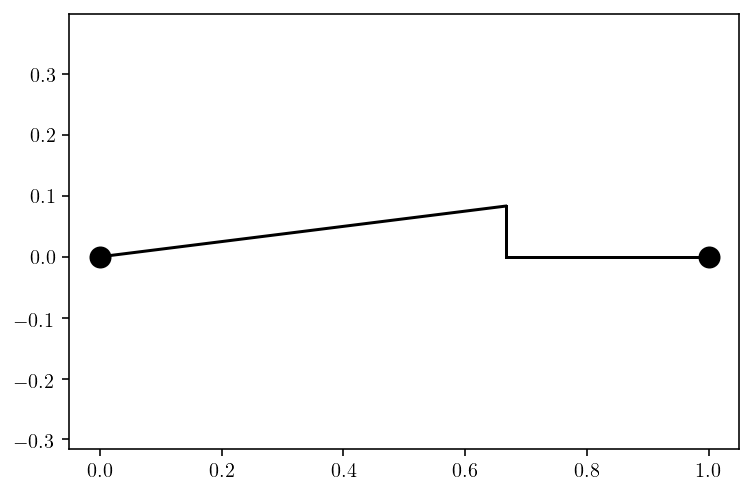

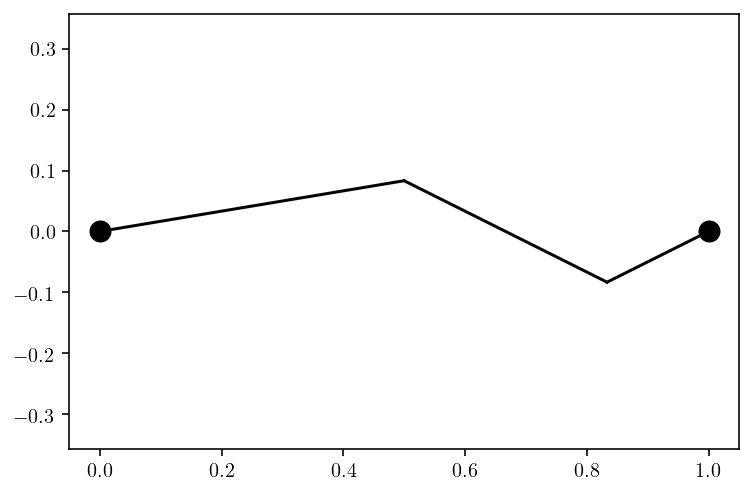

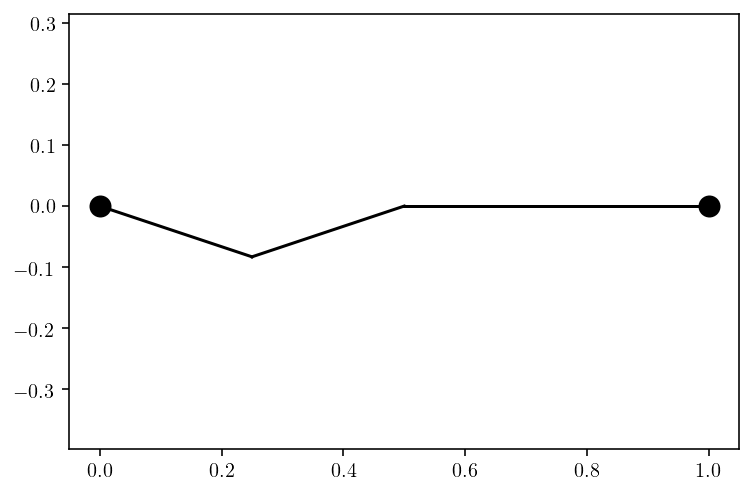

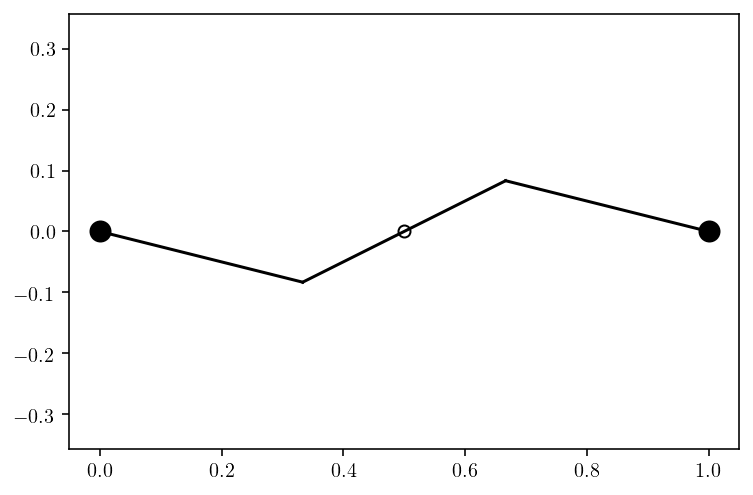

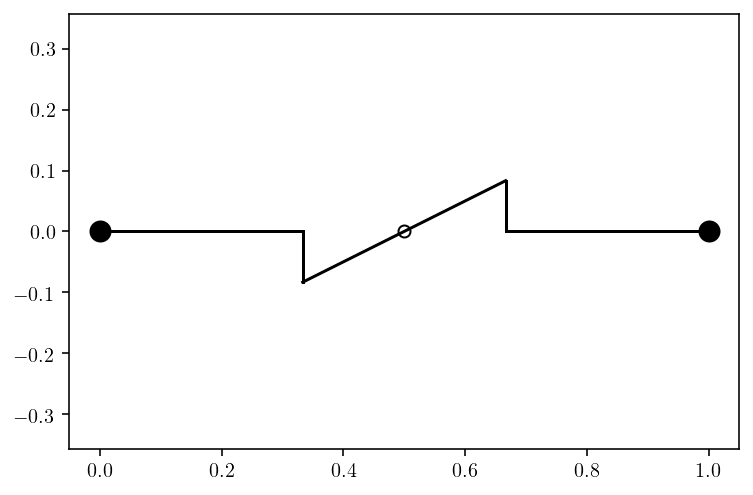

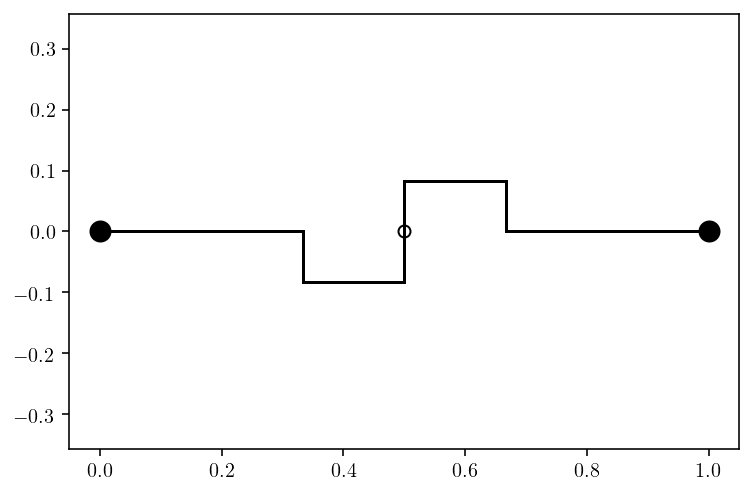

In [56]:
# test plot points

P, V, C = makeEdge('Ea')
plt.figure()
plt.axis('equal')
plotPoints(P)
plotVertices(V)

P, V, C = makeEdge('Eb')
plt.figure()
plt.axis('equal')
plotPoints(P)
plotVertices(V)

P, V, C = makeEdge('Ec')
plt.figure()
plt.axis('equal')
plotPoints(P)
plotVertices(V)

P, V, C = makeEdge('Ca')
plt.figure()
plt.axis('equal')
plotPoints(P)
plotVertices(V)
plotCenters(C)

P, V, C = makeEdge('Cb')
plt.figure()
plt.axis('equal')
plotPoints(P)
plotVertices(V)
plotCenters(C)

P, V, C = makeEdge('Cc')
plt.figure()
plt.axis('equal')
plotPoints(P)
plotVertices(V)
plotCenters(C)

In [57]:
def scale(P, scalefactors):
    '''
    scale points by 2-d scalefactors
    '''
    
    scalex = scalefactors[0]
    scaley = scalefactors[1]

    N = P.shape[0]
    Q = np.empty_like(P)
    
    for ii in range(0,N):
        Q[ii,0] = scalex*P[ii,0]
        Q[ii,1] = scaley*P[ii,1]
        
    return Q

In [58]:
def translate(P, shift):
    '''
    translate points by 2-d shift vector
    '''
    
    N = P.shape[0]
    Q = np.empty_like(P)
    
    for ii in range(0,N):
        Q[ii,:] = P[ii,:] + shift
        
    return Q

In [59]:
def Rz(a):
    '''
    calculate passive rotation matrix around z-axis
    '''
    
    R = np.array([[ np.cos(a), np.sin(a)], 
                  [-np.sin(a), np.cos(a)]])
    
    return R

In [60]:
def rotate(P, A, angle):
    '''
    actively rotate points P->Q around A thru angle (in radians)
    '''
    
    # first translate object back to origin
    P = translate(P, -A)
    
    # then do an active rotation (use minus angle)
    R = Rz(-angle)
    
    N = P.shape[0]
    Q = np.empty_like(P)
    
    for ii in range(0,N):
        Q[ii,:] = np.dot(R, P[ii,:])
    
    # translate back
    Q = translate(Q, A)
    
    return Q

[[0.5 0.5]]


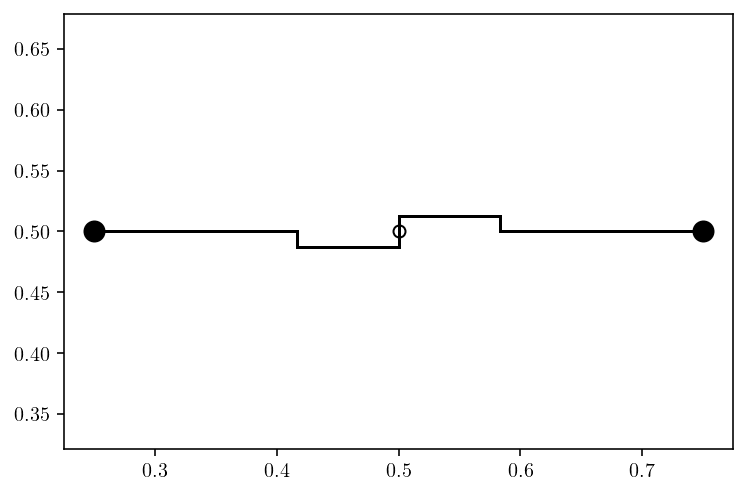

In [61]:
# test scale and translation

P, V, C = makeEdge('Cc')

scalefactors = np.array([0.5, 0.15])
shift = np.array([0.25, .5])

Q = scale(P, scalefactors)
Q = translate(Q, shift)

V = scale(V, scalefactors)
V = translate(V, shift)

C = scale(C, scalefactors)
C = translate(C, shift)
print(C)
plt.figure()
plt.axis('equal')
plotPoints(Q)
plotVertices(V)
plotCenters(C)

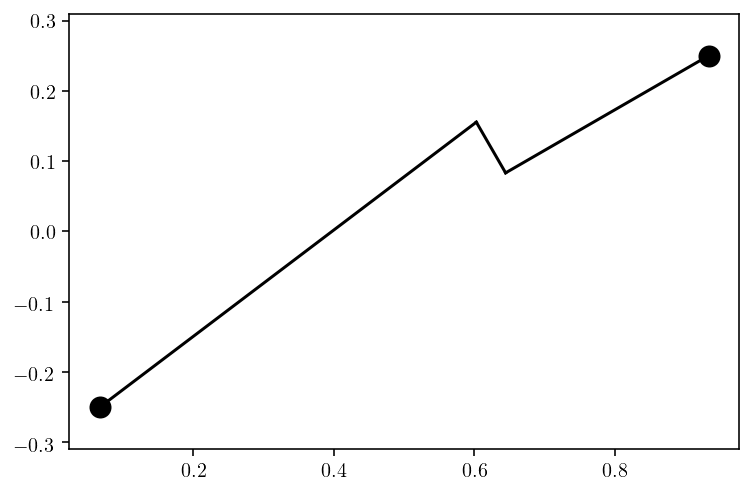

In [62]:
# test rotation

P, V, C = makeEdge('Ea')

A = np.array([0.5, 0])
angle = np.deg2rad(30)
Q = rotate(P, A, angle)
W = rotate(V, A, angle)

plt.figure()
plt.axis('equal')
plotPoints(Q)
plotVertices(W)

In [63]:
def reflect(P, axis):
    '''
    reflect points about an axis = [angle (in radians), y-intercept]
    
    NOTE: if angle=pi/2 then y-intercept is an x-intercept
    '''
    
    # extract reflection axis information
    angle = axis[0]
    b = axis[1]
    
    # check if vertical reflection axis
    if abs(angle)==np.pi/2:
        
        print('vertical reflection axis')
        shift = np.array([b, 0])
        
        # first translate object by -b
        Q = translate(P, -shift)
        
        # now reflect about y-axis
        N = P.shape[0]
        QQ = np.empty_like(P)
        
        for ii in range(0,N):
            QQ[ii,:] = np.array([-Q[ii,0], Q[ii,1]])    

        # translate back
        Q = translate(QQ, shift)
        
    else:
        
        # first translate object by -b
        shift = np.array([0, b])
        Q = translate(P, -shift)
        
        # then rotate by -angle
        A = np.array([0,0])
        Q = rotate(Q, A, -angle)
        
        # now reflect about x-axis
        N = P.shape[0]
        QQ = np.empty_like(P)
        
        for ii in range(0,N):
            QQ[ii,:] = np.array([Q[ii,0], -Q[ii,1]])    
            
        # rotate back
        QQ = rotate(QQ, A, angle)

        # translate back
        Q = translate(QQ, shift)
    
    return Q

In [64]:
def glideReflect(P, axis, scalefac):
    '''
    perform glide reflection of points P 
    
    axis = [angle (rad), y-intercept]
    scalefac = amount to translate by in the direction of the axis
    '''
    
    # first reflect
    Q = reflect(P, axis)
    
    # then translate
    angle = axis[0]
    x = scalefac * np.cos(angle)
    y = scalefac * np.sin(angle)
    shift = np.array([x, y])
    
    Q = translate(Q, shift)
    
    return Q

vertical reflection axis
vertical reflection axis
vertical reflection axis
vertical reflection axis


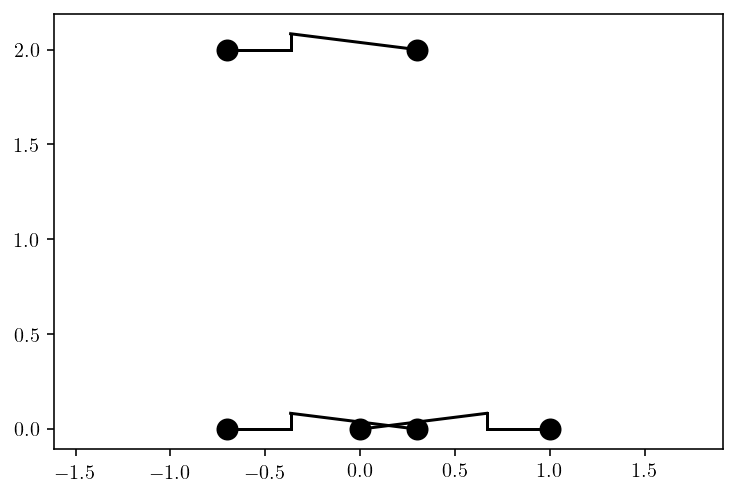

In [65]:
# test reflection and glide reflection

P, V, C = makeEdge('Ea')
plt.figure()
plt.axis('equal')
plotPoints(P)
plotVertices(V)

# reflection
b = 0.15 # y or x-intercept
angle = np.deg2rad(90)
axis = np.array([angle, b])
Q = reflect(P, axis)
plotPoints(Q)
W = reflect(V, axis)
plotVertices(W)

# glide reflection
scalefac = 2
Q = glideReflect(P, axis, scalefac)
plotPoints(Q)
W = glideReflect(V, axis, scalefac)
plotVertices(W)

In [68]:
def makeTile(type):
    '''
    make asymmetric heesch tile
    
    type = 'CCC', etc.
    '''
    
    if type=='CCC':
        
        P1, V1, C1 = makeEdge('Ca')
        P2, V2, C2 = makeEdge('Cb')
        P3, V3, C3 = makeEdge('Cc')
        
        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        
        # rotate edge 2 by 60 degrees
        A = np.array([0,0])
        angle = np.deg2rad(60)
        Q2 = rotate(P2, A, angle)
        
        # rotate edge 3 by -60, then translate to top vertex of equilateral triangle
        T3 = rotate(P3, A, -angle)
        x = np.cos(angle)
        y = np.sin(angle)
        shift = np.array([x,y])
        Q3 = translate(T3, shift)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3), axis=0)
        
        
    if type=='CC6C6':
        
        P1, V1, C1 = makeEdge('Ca')
        P2, V2, C2 = makeEdge('Ea')
        
        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        
        # rotate edge 2 by 60 degrees
        A = np.array([0,0])
        angle = np.deg2rad(60)
        Q2 = rotate(P2, A, angle)
        
        # rotate the new edge 2 by 60 about the vertex (need to change order of points)
        V = np.array([np.cos(angle), np.sin(angle)])
        Q3 = rotate(Q2, V, angle)
        Q3 = np.flipud(Q3)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3), axis=0)
        
    if type=='CGG':
        
        P1, V1, C1 = makeEdge('Ca')
        P2, V2, C2 = makeEdge('Ea')
        
        # leave edge 1 as is (just have the points run in the opposite order)
        Q1 = np.flipud(P1)
        
        # rotate edge 2 by 60 degrees
        A = np.array([0,0])
        angle = np.deg2rad(60)
        Q2 = rotate(P2, A, angle)
        
        # glide reflect the new edge 2 about a horizontal axis passing thru the midpoint
        b = 0.5*np.sin(angle)
        axis = np.array([0, b])
        scalefac = 0.5
        Q3 = glideReflect(Q2, axis, scalefac)
        
        # concatenate points
        P = np.concatenate((Q1, Q2, Q3), axis=0)
        
    return P

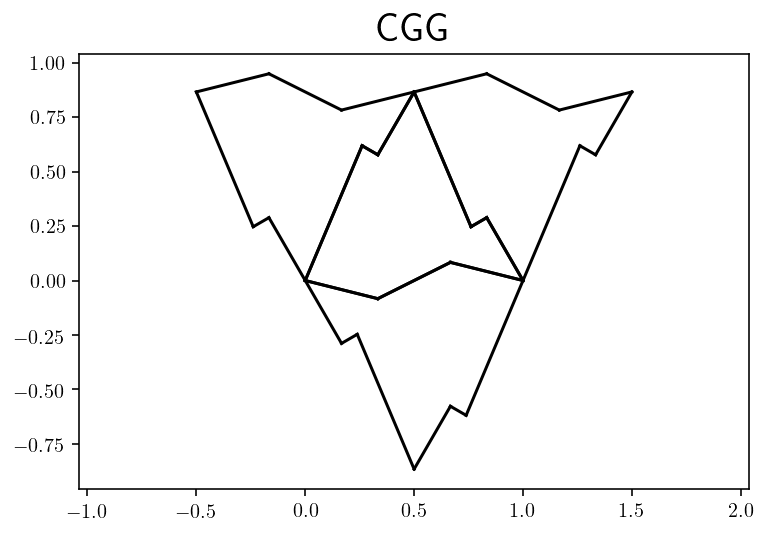

In [69]:
# test make tile
heeschType = 'CGG' 

P = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P)
plt.axis('equal')

# rotate tile about center of bottom edge
A = 0.5*np.array([1,0])
angle = np.deg2rad(180)
Q1 = rotate(P, A, angle)
plotPoints(Q1)

# glide reflect about horizontal axis passing through middle point
angle = np.deg2rad(60)
b = 0.5*np.sin(angle)
axis = np.array([0, b])
scalefac = 0.5
Q2 = glideReflect(P, axis, scalefac)
plotPoints(Q2)

# repeat but in opposite direction
angle = np.deg2rad(60)
b = 0.5*np.sin(angle)
axis = np.array([0, b])
scalefac = -0.5
Q2 = glideReflect(P, axis, scalefac)
plotPoints(Q2)

# rotate tile about vertex by -60 degrees
#angle = np.deg2rad(-60)
#Q3 = rotate(P, V, angle)
#plotPoints(Q3)


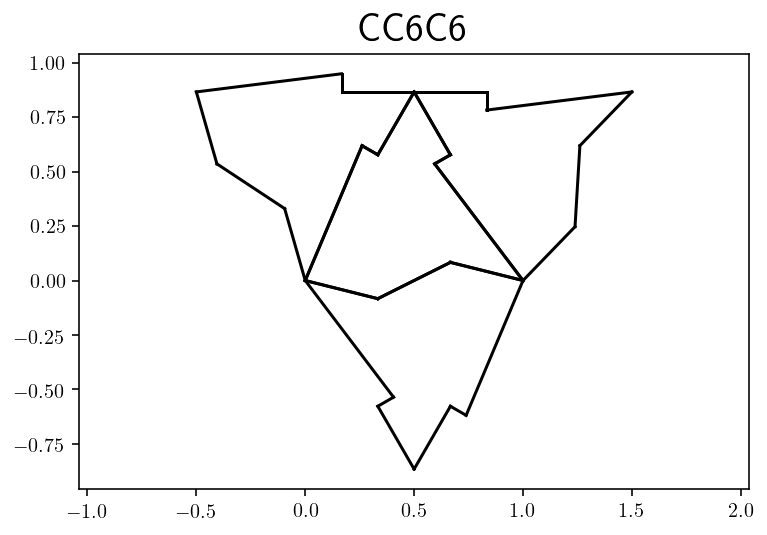

In [70]:
# test make tile
heeschType = 'CC6C6' 

P = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P)
plt.axis('equal')

# rotate tile about center of bottom edge
A = 0.5*np.array([1,0])
angle = np.deg2rad(180)
Q1 = rotate(P, A, angle)
plotPoints(Q1)

# rotate tile about vertex by 60 degrees
V = np.array([np.cos(np.deg2rad(60)), np.sin(np.deg2rad(60))])
angle = np.deg2rad(60)
Q2 = rotate(P, V, angle)
plotPoints(Q2)

# rotate tile about vertex by -60 degrees
angle = np.deg2rad(-60)
Q3 = rotate(P, V, angle)
plotPoints(Q3)


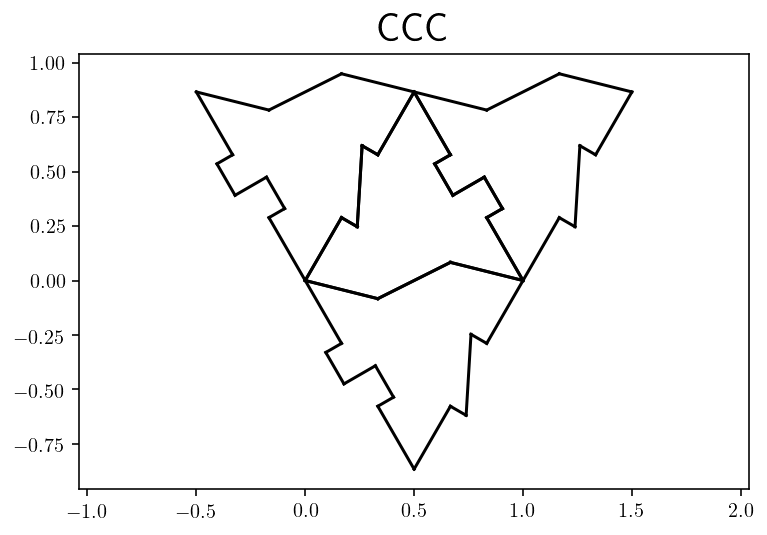

In [71]:
# test make tile
heeschType = 'CCC' 

P = makeTile(heeschType)
plt.figure()
plt.title(heeschType, fontsize='20')
plotPoints(P)
plt.axis('equal')

# rotate tile about centers of edges
A = 0.5*np.array([1,0])
angle = np.deg2rad(180)
Q1 = rotate(P, A, angle)
plotPoints(Q1)

A = 0.5*np.array([np.cos(np.deg2rad(60)), np.sin(np.deg2rad(60))])
angle = np.deg2rad(180)
Q2 = rotate(P, A, angle)
plotPoints(Q2)

A = A + 0.5*np.array([1,0])
angle = np.deg2rad(180)
Q3 = rotate(P, A, angle)
plotPoints(Q3)

# translate tile
#shift = np.array([1,0])
#R = translate(Q, shift)
#plotPoints(R)